## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [5]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
#s = json.load( open(os.getenv("/fbb_matplotlibrc.json")
#pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [7]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

In [8]:
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

## exploratory phase

In [9]:
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(...
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [10]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)  

/Users/Faye/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


In [11]:
#do the same for females
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(allmales['all'])
print allfemales['all'].columns

for j in allmales:
    nonreal  = allfemales[j].applymap(np.isreal)
    for d in allfemales[j].columns :
        if nonreal.sum()[d]>1 and nonreal.sum()[d]<49:
            allfemales[j][d][~nonreal[c]] = np.float('NaN')
            allfemales[j][d] = allfemales[j][d].astype(float)


Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

/Users/Faye/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)
also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

/Users/Faye/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


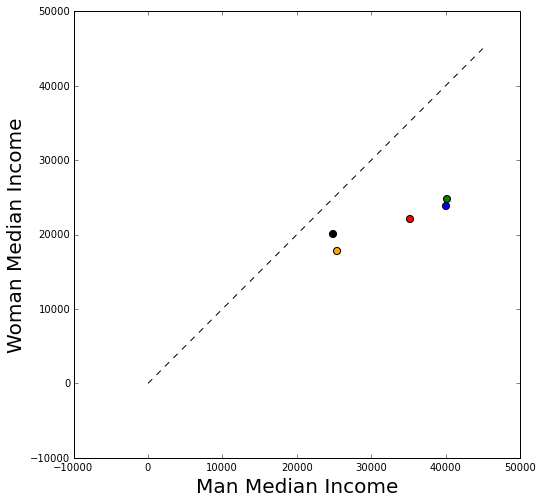

In [12]:
##pl.scatter[...]
pl.figure(figsize=(8,8))
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1],s=50,c='r', label='all')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1],s=50,c='k', label='black')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1],s=50,c='b', label='white')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1],s=50,c='g', label='asian')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1],s=50,c='orange', label='hispanic')
pl.xlabel('Man Median Income', size=20)
pl.ylabel('Woman Median Income', size=20)
pl.plot([0,45000],[0,45000],'k--')


#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [42]:
all_males = np.array(allmales['all']['Median income'].dropna())
all_females = np.array(allfemales['all']['Median income'].dropna())
all_females=all_females[:-1]
df=pd.DataFrame({'all_females':all_females,'all_males':all_males})

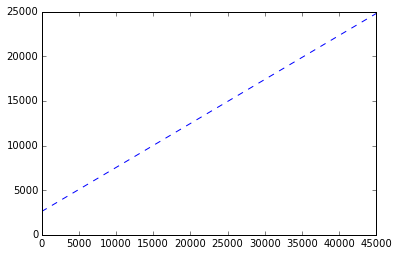

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mode = smf.ols('all_females~all_males', data=df).fit()
x= pd.DataFrame({'all_males': np.linspace(0, 45000, 200)})
pl.plot(x,mode.predict(x),'--', label='My Regression')

## it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [53]:
from scipy import stats
cor = stats.spearmanr(all_males, all_females)
print all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()
print cor, beta1, beta0

1.52209985495
SpearmanrResult(correlation=0.8518773820833847, pvalue=3.3344848041908966e-70) 0.559672467818 2231.077597


## and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

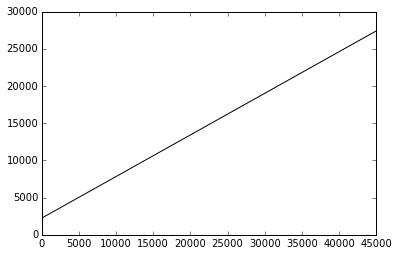

In [54]:
y=beta1*x+beta0
pl.plot(x,y,c='black')

#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [46]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

In [47]:
#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

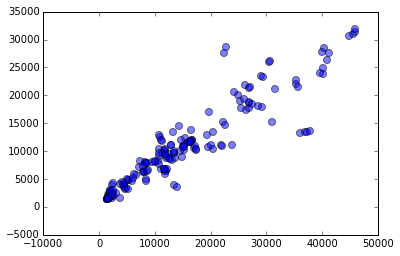

In [48]:
#fit and plot [...]
pl.scatter(all_males, all_females, s=50, alpha=0.5, c='b')

In [49]:
#is the line fit similar? can you find any high legverage points?
model_all=np.ma.polyfit(all_males,all_females,1)
print model_all[0], model_all[1]

0.609020523617 1493.03944114


In [50]:
##remove
##this was my final plot. yours do not have to look like this, this is just an example
#for your convenience.

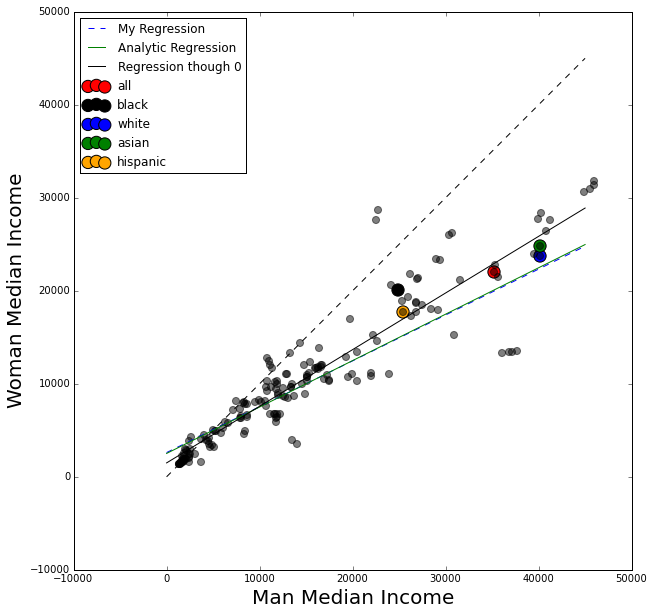

In [51]:

pl.figure(figsize=(10,10))
pl.xlim(-10000, 50000)
pl.ylim(-10000, 50000)
pl.xlabel('Man Median Income', size=20)
pl.ylabel('Woman Median Income', size=20)
pointsize = 150
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1],s=pointsize,c='r', label='all')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1],s=pointsize,c='k', label='black')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1],s=pointsize,c='b', label='white')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1],s=pointsize,c='g', label='asian')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1],s=pointsize,c='orange', label='hispanic')
pl.plot([0,45000],[0,45000],'k--')
pl.plot(x,mode.predict(x),'b--', label='My Regression')
pl.plot(x,beta1*x+beta0,c='green',label='Analytic Regression')
pl.scatter(all_males, all_females, s=50, alpha=0.5, c='k')
pl.plot(x,model_all[0]*x+model_all[1],'k',label='Regression though 0')
pl.legend(loc='best')

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make



In [52]:
stp=50000
f_stp = model_all[0]*stp+model_all[1]
print f_stp

31944.065622


##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

### <font color='blue'>Females earn less money than males.</font>